In [1]:
%cd ../
%matplotlib inline

/home/work/AnacondaProjects/HTFATorch


In [2]:
# import dependencies
import logging
import numpy as np

import htfa_torch.tfa as TFA
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s',
                            datefmt='%m/%d/%Y %H:%M:%S',
                            level=logging.INFO)

In [4]:
tfa = TFA.TopographicalFactorAnalysis('data/pieman_data/sub-001-task-intact1.nii', num_factors=25)

In [5]:
prior_sample = tfa.sample()

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    prior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

prior_sample

del prior_sample

03/24/2018 14:12:37 Prior Reconstruction Error (Frobenius Norm): 5.34357324e+03


In [6]:
losses = tfa.train(num_steps=200, log_level=logging.INFO, batch_size=tfa.voxel_activations.shape[0], num_particles=4)

03/24/2018 14:12:37 [Epoch 1] (318ms) Posterior free-energy 8.55919923e+09
03/24/2018 14:12:37 [Epoch 2] (329ms) Posterior free-energy 7.44328806e+09
03/24/2018 14:12:38 [Epoch 3] (295ms) Posterior free-energy 6.72587776e+09
03/24/2018 14:12:38 [Epoch 4] (298ms) Posterior free-energy 6.01984768e+09
03/24/2018 14:12:38 [Epoch 5] (327ms) Posterior free-energy 4.51634893e+09
03/24/2018 14:12:39 [Epoch 6] (297ms) Posterior free-energy 4.62240768e+09
03/24/2018 14:12:39 [Epoch 7] (328ms) Posterior free-energy 3.81710515e+09
03/24/2018 14:12:39 [Epoch 8] (296ms) Posterior free-energy 3.87028608e+09
03/24/2018 14:12:40 [Epoch 9] (329ms) Posterior free-energy 3.26008243e+09
03/24/2018 14:12:40 [Epoch 10] (327ms) Posterior free-energy 3.03855718e+09
03/24/2018 14:12:40 [Epoch 11] (334ms) Posterior free-energy 2.52265498e+09
03/24/2018 14:12:41 [Epoch 12] (330ms) Posterior free-energy 2.44749030e+09
03/24/2018 14:12:41 [Epoch 13] (340ms) Posterior free-energy 2.17687245e+09
03/24/2018 14:12:41 [

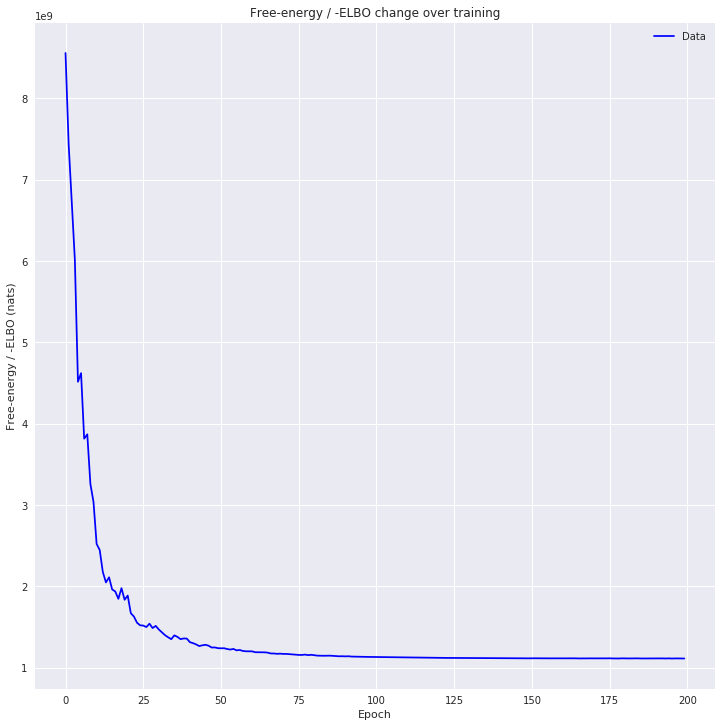

03/24/2018 14:13:45 Reconstruction Error (Frobenius Norm): 4.79796484e+03
03/24/2018 14:13:45 {'weights': array([[-0.30978748,  2.0015478 ,  0.85833484, ...,  0.59746516,
        -1.8439759 ,  0.4418703 ],
       [-1.2430127 ,  0.89506197,  1.8993906 , ...,  0.50608134,
        -0.00707129,  0.99913305],
       [-2.004167  ,  0.27873805,  1.6794437 , ..., -1.3539917 ,
         0.72321045,  1.4818611 ],
       ...,
       [-3.9006615 ,  0.34601402,  0.9517929 , ..., -0.4800922 ,
         0.16802746,  0.12165093],
       [-4.372874  ,  0.05980408,  2.221197  , ..., -0.25785476,
        -0.29515183, -0.75588673],
       [-5.762823  ,  0.6370639 ,  3.9224546 , ...,  2.1243162 ,
         0.75798494, -1.824637  ]], dtype=float32), 'factors': array([[9.7574610e-03, 1.0257254e-02, 1.0728321e-02, ..., 8.9925053e-03,
        9.8429080e-03, 1.0282915e-02],
       [2.3531329e-03, 2.3095489e-03, 2.2523755e-03, ..., 6.9803882e-01,
        7.2093993e-01, 6.8539208e-01],
       [9.4367634e-04, 9.43345

In [7]:
utils.plot_losses(losses)

results = tfa.results()
logging.info(results)

In [8]:
posterior_sample = tfa.sample(posterior_predictive=True)

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    posterior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

posterior_sample

03/24/2018 14:13:46 Prior Reconstruction Error (Frobenius Norm): 4.83232471e+03


Trace{'Weights0': Normal([torch.cuda.FloatTensor of size 1x300x25]), 'FactorCenters0': Normal([torch.cuda.FloatTensor of size 1x25x3]), 'FactorLogWidths0': Normal([torch.cuda.FloatTensor of size 1x25]), 'Y0': Normal([torch.cuda.FloatTensor of size 1x300x94537])}

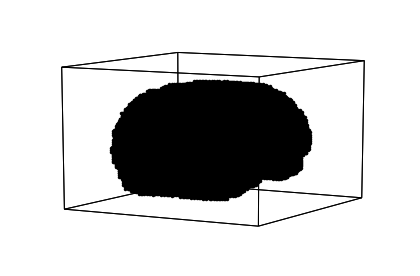

03/24/2018 14:13:47 Reconstruction Error (Frobenius Norm): 4.79765771e+03


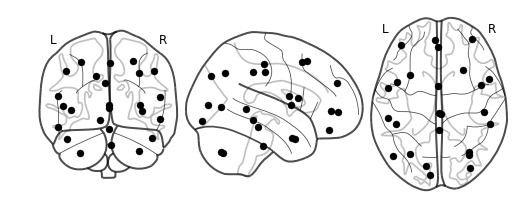

In [9]:
tfa.plot_voxels()
tfa.plot_factor_centers()

/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


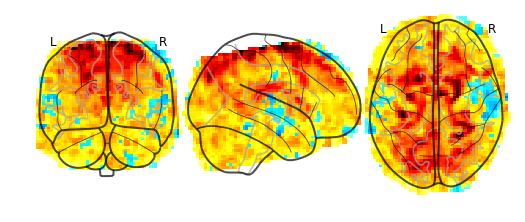

03/24/2018 14:13:48 Reconstruction Error (Frobenius Norm): 4.79804297e+03


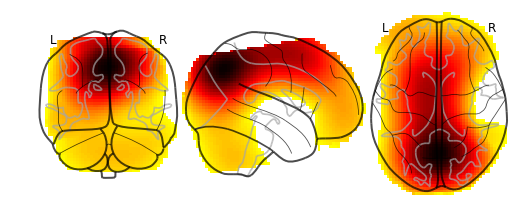

In [10]:
tfa.plot_original_brain()
tfa.plot_reconstruction()

03/24/2018 14:14:04 Reconstruction Error (Frobenius Norm): 4.79820068e+03


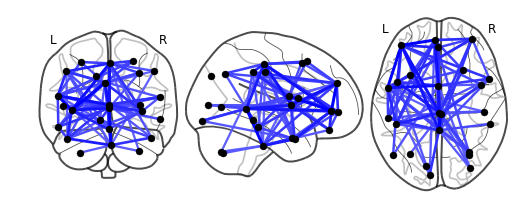

In [11]:
tfa.plot_connectome()